# Not All Classification Errors Are Equal

# Bank Loan Problem

# Cancer Diagnosis Problem

# Cost-Sensitive Learning

# Cost-Sensitive Imbalanced Classification

# Cost-Sensitive Logistic Regression

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


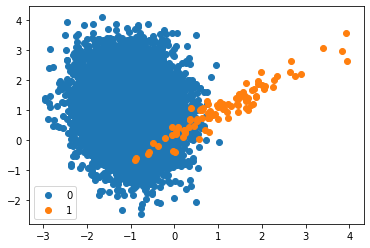

In [2]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [8]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.985


In [10]:
model = LogisticRegression(solver='lbfgs')
model.fit(X,y)
pr=model.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9897    3]
 [  40   60]]


# Logistic Regression for Imbalanced Classification

# Weighted Logistic Regression with Scikit-Learn

In [3]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [5]:
weights = {0:1.0, 1:100}
model = LogisticRegression(solver='lbfgs', class_weight=weights)

In [6]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.989


In [7]:
weights = {0:0.01, 1:1}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X,y)
pr=model.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9317  583]
 [   5   95]]


In [17]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import make_classification
weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

[ 0.50505051 50.        ]


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [18]:
weights = {0:0.50505051, 1:50.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X,y)
pr=model.predict(X)

In [19]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[9310  590]
 [   5   95]]


In [20]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.989


In [21]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
model.fit(X,y)
pr=model.predict(X)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[9310  590]
 [   5   95]]


# Grid Search Weighted Logistic Regression

In [36]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

In [37]:
model = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [38]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')

In [39]:
grid_result = grid.fit(X, y)

In [40]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.988943 using {'class_weight': {0: 1, 1: 100}}
0.982148 (0.017020) with: {'class_weight': {0: 100, 1: 1}}
0.983465 (0.015555) with: {'class_weight': {0: 10, 1: 1}}
0.985242 (0.013456) with: {'class_weight': {0: 1, 1: 1}}
0.987973 (0.009846) with: {'class_weight': {0: 1, 1: 10}}
0.988943 (0.006354) with: {'class_weight': {0: 1, 1: 100}}


In [111]:
weights = {0:.10, 1:200.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X,y)
pr=model.predict(X)

In [112]:
model = LogisticRegression(solver='lbfgs', class_weight='balanced')
model.fit(X,y)
pr=model.predict(X)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[9310  590]
 [   5   95]]


# Cost-Sensitive Decision Trees

In [113]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [114]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=3)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


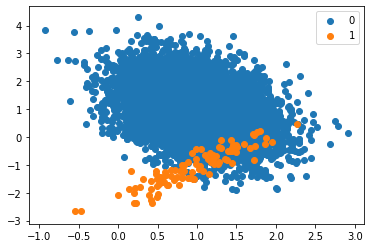

In [115]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [116]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [117]:
model = DecisionTreeClassifier()

In [118]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.739


In [120]:
model = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model.fit(x_train,y_train)
pr=model.predict(x_test)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[3279   13]
 [  21   21]]


# Decision Trees for Imbalanced Classification

# Weighted Decision Tree With Scikit-Learn

In [121]:
model = DecisionTreeClassifier(class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.751


In [126]:
weights = {0:.1, 1:10.0}
model = DecisionTreeClassifier(class_weight=weights)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model.fit(x_train,y_train)
pr=model.predict(x_test)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[3274   18]
 [  21   21]]


# Grid Search Weighted Decision Tree

In [8]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [1]:
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]

In [2]:
param_grid = dict(class_weight=balance)

In [3]:
param_grid

{'class_weight': [{0: 100, 1: 1},
  {0: 10, 1: 1},
  {0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 100}]}

In [5]:
param_grid['class_weight']

[{0: 100, 1: 1}, {0: 10, 1: 1}, {0: 1, 1: 1}, {0: 1, 1: 10}, {0: 1, 1: 100}]

In [10]:
model = DecisionTreeClassifier()

In [11]:

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')

In [13]:
grid_result = grid.fit(X, y)

In [14]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.755791 using {'class_weight': {0: 1, 1: 10}}


In [16]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

0.738855 (0.075224) with: {'class_weight': {0: 100, 1: 1}}
0.735623 (0.071431) with: {'class_weight': {0: 10, 1: 1}}
0.734074 (0.065675) with: {'class_weight': {0: 1, 1: 1}}
0.755791 (0.075199) with: {'class_weight': {0: 1, 1: 10}}
0.749360 (0.074670) with: {'class_weight': {0: 1, 1: 100}}


# Cost-Sensitive Support Vector Machines

In [127]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


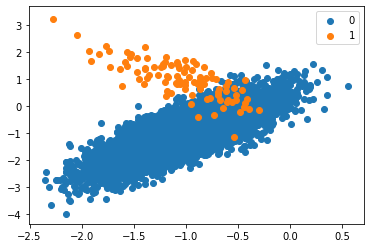

In [128]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [129]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [130]:
model = SVC(gamma='scale')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.808


# SVM for Imbalanced Classification

In [131]:
model = SVC(gamma='scale', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.967


# Grid Search Weighted SVM

In [132]:
model = SVC(gamma='scale')
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]

In [133]:
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [134]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)

In [135]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.967747 using {'class_weight': {0: 1, 1: 100}}


In [136]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

0.742960 (0.149857) with: {'class_weight': {0: 100, 1: 1}}
0.748404 (0.149873) with: {'class_weight': {0: 10, 1: 1}}
0.807960 (0.126354) with: {'class_weight': {0: 1, 1: 1}}
0.934401 (0.065202) with: {'class_weight': {0: 1, 1: 10}}
0.967747 (0.038637) with: {'class_weight': {0: 1, 1: 100}}


In [137]:
weights = {0:.1, 1:100.0}
model = SVC(gamma='scale', class_weight='balanced')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model.fit(x_train,y_train)
pr=model.predict(x_test)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[3099  197]
 [   4   34]]


# Advanced Algorithms

In [138]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [139]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)

In [140]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [141]:
yhat = model.predict_proba(testX)

In [142]:
yhat = yhat[:, 1]

In [143]:
fpr, tpr, thresholds = roc_curve(testy, yhat)

In [145]:
thresholds

array([1.99999835e+00, 9.99998347e-01, 4.96107783e-01, 4.64133790e-01,
       4.37378298e-01, 4.10290652e-01, 3.60605429e-01, 3.18080562e-01,
       2.66733994e-01, 2.58835081e-01, 2.56035560e-01, 2.39921159e-01,
       2.22567047e-01, 1.43505643e-01, 1.41327098e-01, 1.09726224e-01,
       1.07837317e-01, 9.20957096e-02, 9.02480016e-02, 7.34506191e-02,
       6.96974524e-02, 6.27586051e-02, 6.03914597e-02, 4.93544524e-02,
       4.92428780e-02, 4.17944224e-02, 4.17364870e-02, 2.99406545e-02,
       2.98037729e-02, 1.93442867e-02, 1.93349888e-02, 1.86417850e-02,
       1.86356233e-02, 1.61540845e-02, 1.61528512e-02, 8.85173160e-03,
       8.83828307e-03, 4.91894272e-03, 4.86537595e-03, 2.76888081e-03,
       2.76565429e-03, 2.22207193e-03, 2.21906816e-03, 7.26905980e-07])

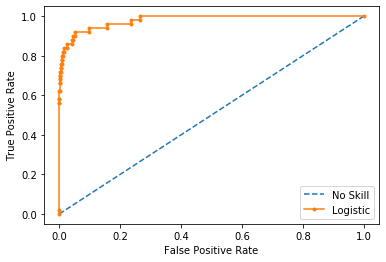

In [144]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [146]:
import numpy as np
gmeans = np.sqrt(tpr * (1-fpr))

In [147]:
gmeans

array([0.        , 0.14142136, 0.74833148, 0.74825588, 0.76150038,
       0.76134649, 0.78716214, 0.78700301, 0.81199343, 0.81191133,
       0.8241212 , 0.82387113, 0.83589908, 0.83513744, 0.84698395,
       0.84612486, 0.8577961 , 0.85736029, 0.868869  , 0.86807345,
       0.8794213 , 0.87870428, 0.88989842, 0.88826241, 0.89929714,
       0.898099  , 0.90898545, 0.90552513, 0.91624177, 0.90728588,
       0.91777509, 0.91641815, 0.92677348, 0.92323542, 0.93343722,
       0.91035347, 0.92019541, 0.88966229, 0.89907697, 0.85666018,
       0.86553773, 0.84855909, 0.85717412, 0.        ])

In [148]:
ix = np.argmax(gmeans)

In [149]:
ix

34

In [151]:
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.016153, G-mean=0.933


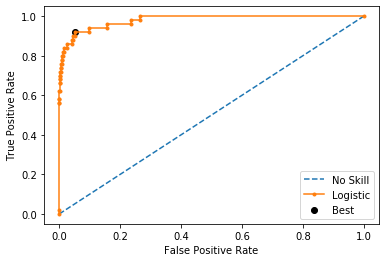

In [152]:
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# Optimal Threshold for Precision-Recall Curve

In [153]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

In [154]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)

In [155]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [156]:
yhat = model.predict_proba(testX)

In [157]:
yhat = yhat[:, 1]

In [158]:
precision, recall, thresholds = precision_recall_curve(testy, yhat)

In [159]:
thresholds

array([0.00221907, 0.00222207, 0.00222486, ..., 0.99905196, 0.99996111,
       0.99999835])

In [160]:
precision

array([0.03668379, 0.03597651, 0.03600294, ..., 1.        , 1.        ,
       1.        ])

In [161]:
recall

array([1.  , 0.98, 0.98, ..., 0.04, 0.02, 0.  ])

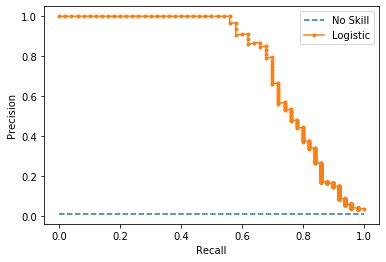

In [162]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

F-measure =(2 * Precision * Recall)/(Precision + Recall)

In [163]:
fscore = (2 * precision * recall) / (precision + recall)

In [165]:
ix = np.argmax(fscore)
print("position",ix)
print('Best Threshold=%f, F-measure=%.3f' % (thresholds[ix], fscore[ix]))

position 1323
Best Threshold=0.256036, F-measure=0.756


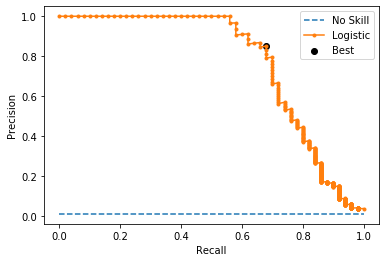

In [166]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot

# Optimal Threshold Tuning

In [34]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [35]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2,
stratify=y)

In [36]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [37]:
yhat = model.predict(testX)
# evaluate the model
score = f1_score(testy, yhat)
print('F-measure: %.5f' % score)

F-measure: 0.70130


In [38]:
yhat = model.predict_proba(testX)

In [39]:
probs = yhat[:, 1]

In [45]:
probs

array([0.0072413 , 0.00350449, 0.00013243, ..., 0.00121941, 0.00029446,
       0.00039661])

In [41]:
thresholds = np.arange(0, 1, 0.001)

In [42]:
thresholds

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,

In [48]:
testy

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [50]:
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

In [51]:
scores

[0.019801980198019802,
 0.04746084480303749,
 0.06747638326585693,
 0.08046940486169321,
 0.09667673716012085,
 0.10942956926658905,
 0.1219195849546044,
 0.13564213564213565,
 0.1499202551834131,
 0.1591695501730104,
 0.17358490566037735,
 0.19126819126819128,
 0.20767494356659147,
 0.21904761904761907,
 0.2340966921119593,
 0.24274406332453824,
 0.2555555555555556,
 0.2647058823529411,
 0.27522935779816515,
 0.28295819935691324,
 0.29054054054054057,
 0.3028169014084507,
 0.31159420289855067,
 0.33204633204633205,
 0.3426294820717132,
 0.3583333333333334,
 0.36595744680851067,
 0.38053097345132747,
 0.3926940639269406,
 0.40375586854460094,
 0.4019138755980861,
 0.40579710144927533,
 0.4158415841584159,
 0.42,
 0.4307692307692308,
 0.43979057591623033,
 0.44919786096256686,
 0.4590163934426229,
 0.46408839779005523,
 0.47191011235955066,
 0.48000000000000004,
 0.48554913294797697,
 0.47953216374269003,
 0.48520710059171596,
 0.4880952380952381,
 0.49397590361445787,
 0.49397590361445

In [54]:
ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.251, F-measure=0.75556


# Probability Calibration

# Decision Tree With Calibrated Probabilities

In [68]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [69]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = DecisionTreeClassifier()

In [70]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.840


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pr=model.predict(x_test)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, pr) 
print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[3287    9]
 [  13   25]]


# example of evaluating the decision tree with calibrated probabilities for imbalanced classification

In [81]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier

In [82]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = DecisionTreeClassifier()

In [83]:
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=3)

In [84]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.857


In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
model = DecisionTreeClassifier()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=3)


In [86]:
calibrated.fit(x_train,y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(), cv=3)

In [87]:
pr=calibrated.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, pr) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[3289    7]
 [  12   26]]


# Exapmle 

In [15]:
import pandas as pd

In [16]:
data=pd.read_csv("E:\data\Imb\imb.csv")

In [17]:
data.head()

,Feature 1,Feature 2,Target
0,-0.553339,1.120375,0
1,-1.340687,1.497140,0
2,-0.732003,1.361169,0
3,-2.109361,0.995355,0
4,-1.220352,1.553905,0


In [19]:
x=data.iloc[:,:-1]

In [20]:
y=data.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [23]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [25]:
predicted_classes_train = model.predict(x_train)

In [26]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_train, predicted_classes_train) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[6593    2]
 [  26   45]]


In [27]:
predicted_classes_test = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predicted_classes_test) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[3304    1]
 [  13   16]]


In [33]:
weights = {0:1, 1:100}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 100})

In [34]:
predicted_classes_train = model.predict(x_train)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_train, predicted_classes_train) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[6259  336]
 [   2   69]]


In [35]:
predicted_classes_test = model.predict(x_test)
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(y_test, predicted_classes_test) 
print ('Confusion Matrix :')
print(results) 


Confusion Matrix :
[[3138  167]
 [   4   25]]
